In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,classification_report
from sklearn.tree import export_graphviz
import six
from sklearn import tree
# Convert to png using system command (requires Graphviz)
from subprocess import call
# Display in jupyter notebook
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
heart=pd.read_csv('/content/drive/MyDrive/heart_2022_with_nans.csv')
heart.shape

(445132, 40)

In [ ]:
df=heart.dropna()
# Encoding columns
replacement_dict = {'Yes': 1, 'No': 0}
df['HadHeartAttack'] = df['HadHeartAttack'].replace(replacement_dict).astype(int)
df['HadAngina'] = df['HadAngina'].replace(replacement_dict).astype(int)

<ipython-input-88-295527692d1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HadHeartAttack'] = df['HadHeartAttack'].replace(replacement_dict).astype(int)
<ipython-input-88-295527692d1c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HadAngina'] = df['HadAngina'].replace(replacement_dict).astype(int)


In [ ]:
df['CAD'] = df['HadHeartAttack'] | df['HadAngina']

# Drop old columns
df.drop(columns = ['HadHeartAttack','HadAngina'], inplace = True)

df.shape
df['CAD']

<ipython-input-89-a5daa6cbc220>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CAD'] = df['HadHeartAttack'] | df['HadAngina']
<ipython-input-89-a5daa6cbc220>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['HadHeartAttack','HadAngina'], inplace = True)


342       0
343       0
345       0
346       0
347       0
         ..
445117    0
445123    0
445124    0
445128    0
445130    1
Name: CAD, Length: 246022, dtype: int64

<ipython-input-23-4a3c5c250612>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CAD', ax=ax[0],palette='cool')


Text(0.5, 1.0, 'CAD Disease')

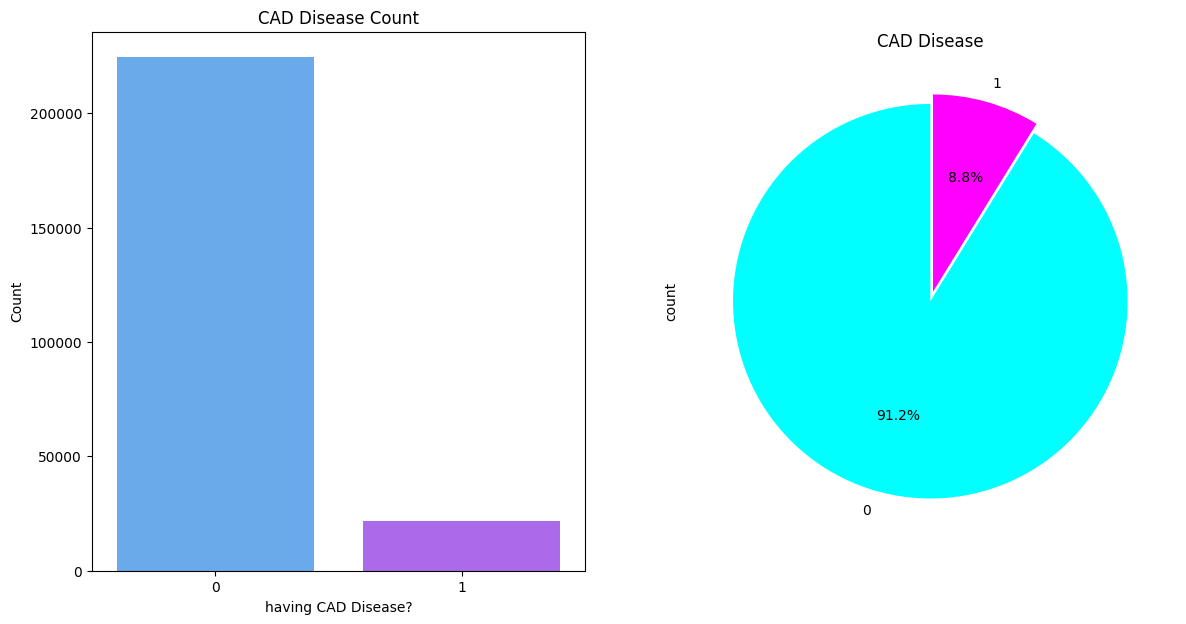

In [ ]:
fig,ax=plt.subplots(1, 2, figsize = (14,7))
sns.countplot(data=df, x='CAD', ax=ax[0],palette='cool')
ax[0].set_xlabel("having CAD Disease?")
ax[0].set_ylabel("Count")
ax[0].set_title("CAD Disease Count")
df['CAD'].value_counts().plot.pie(explode=[0,0.05],startangle=90, autopct='%0.1f%%',ax=ax[1],cmap='cool')
plt.title("CAD Disease")

In [ ]:
searchList=['HadKidneyDisease','Sex','AgeCategory','PhysicalActivities','SmokerStatus',
            'ChestScan','AlcoholDrinkers','HadStroke','HadDiabetes','ECigaretteUsage']
searchList_2=['HadAsthma','HadDepressiveDisorder','FluVaxLast12','PneumoVaxEver','TetanusLast10Tdap'
              ,'CovidPos']
searchList_3=['HIVTesting','GeneralHealth','LastCheckupTime']
searchList_4=['AgeCategory']

AgeCategory

In [ ]:
target_df=df[df.CAD==1]
nontarget_df=df[df.CAD==0]

In [ ]:
nontarget_df['AgeCategory'].value_counts().sort_values(ascending=False)

AgeCategory
Age 65 to 69       25119
Age 60 to 64       24258
Age 70 to 74       21770
Age 55 to 59       20571
Age 50 to 54       18883
Age 40 to 44       16612
Age 45 to 49       16140
Age 35 to 39       15371
Age 75 to 79       14701
Age 80 or older    13737
Age 30 to 34       13197
Age 18 to 24       13033
Age 25 to 29       11014
Name: count, dtype: int64

In [ ]:
target_df['AgeCategory'].value_counts().sort_values(ascending=False)

AgeCategory
Age 80 or older    4079
Age 70 to 74       3969
Age 65 to 69       3438
Age 75 to 79       3435
Age 60 to 64       2462
Age 55 to 59       1653
Age 50 to 54       1030
Age 45 to 49        613
Age 40 to 44        361
Age 35 to 39        243
Age 30 to 34        149
Age 25 to 29         95
Age 18 to 24         89
Name: count, dtype: int64

In [ ]:
df['AgeCategory'].value_counts().sort_values(ascending=False)


AgeCategory
Age 65 to 69       28557
Age 60 to 64       26720
Age 70 to 74       25739
Age 55 to 59       22224
Age 50 to 54       19913
Age 75 to 79       18136
Age 80 or older    17816
Age 40 to 44       16973
Age 45 to 49       16753
Age 35 to 39       15614
Age 30 to 34       13346
Age 18 to 24       13122
Age 25 to 29       11109
Name: count, dtype: int64

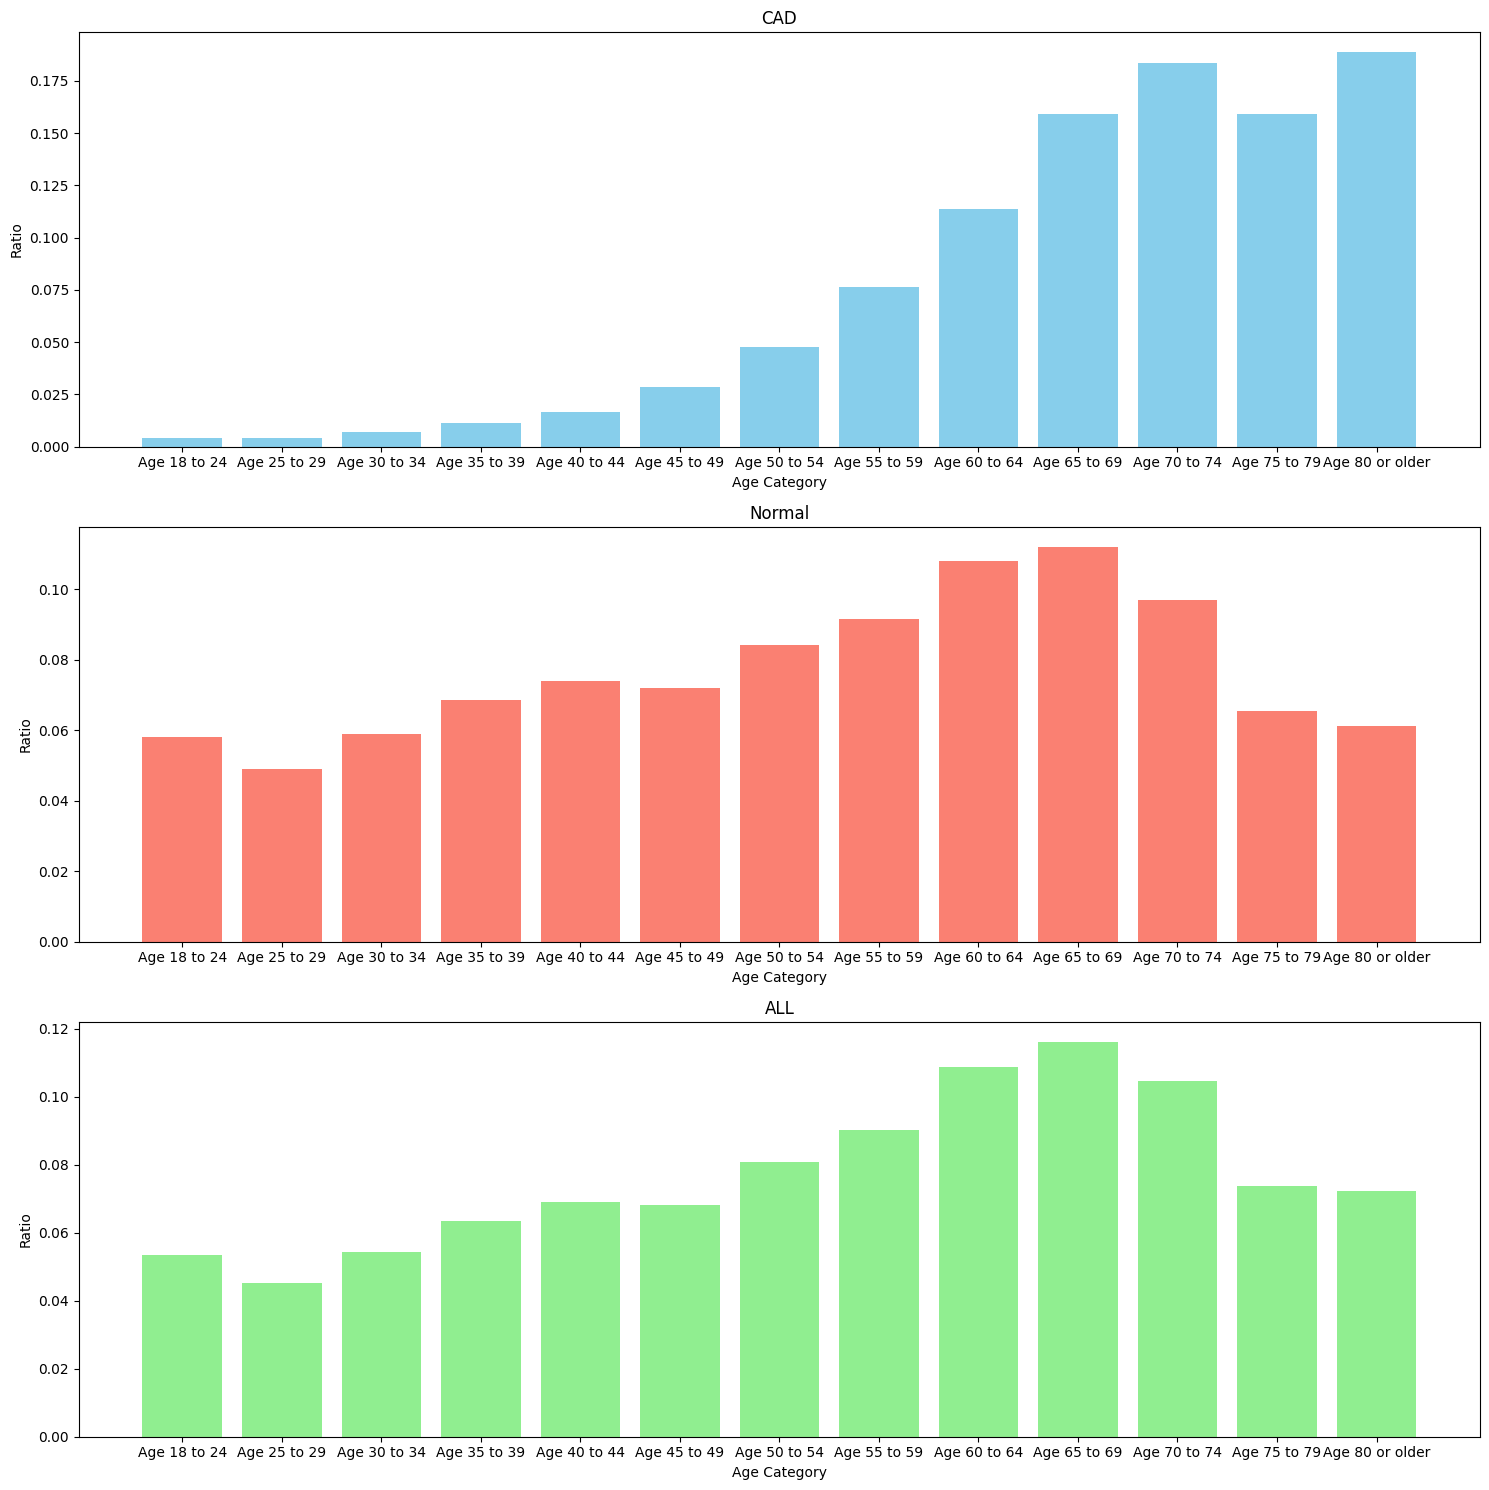

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 예시 데이터
target_df = pd.Series({
    'Age 18 to 24': 89,
    'Age 25 to 29': 95,
    'Age 30 to 34': 149,
    'Age 35 to 39': 243,
    'Age 40 to 44': 361,
    'Age 45 to 49': 613,
    'Age 50 to 54': 1030,
    'Age 55 to 59': 1653,
    'Age 60 to 64': 2462,
    'Age 65 to 69': 3438,
    'Age 70 to 74': 3969,
    'Age 75 to 79': 3435,
    'Age 80 or older': 4079
})

nontarget_df = pd.Series({
    'Age 18 to 24': 13033,
    'Age 25 to 29': 11014,
    'Age 30 to 34': 13197,
    'Age 35 to 39': 15371,
    'Age 40 to 44': 16612,
    'Age 45 to 49': 16140,
    'Age 50 to 54': 18883,
    'Age 55 to 59': 20571,
    'Age 60 to 64': 24258,
    'Age 65 to 69': 25119,
    'Age 70 to 74': 21770,
    'Age 75 to 79': 14701,
    'Age 80 or older': 13737
})

df = pd.Series({
    'Age 18 to 24': 13122,
    'Age 25 to 29': 11109,
    'Age 30 to 34': 13346,
    'Age 35 to 39': 15614,
    'Age 40 to 44': 16973,
    'Age 45 to 49': 16753,
    'Age 50 to 54': 19913,
    'Age 55 to 59': 22224,
    'Age 60 to 64': 26720,
    'Age 65 to 69': 28557,
    'Age 70 to 74': 25739,
    'Age 75 to 79': 18136,
    'Age 80 or older': 17816
})

# 각 데이터프레임의 값을 전체 합계로 나누어 비율 계산
target_df_ratio = target_df / target_df.sum()
nontarget_df_ratio = nontarget_df / nontarget_df.sum()
df_ratio = df / df.sum()

# 막대차트 그리기
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# 첫 번째 subplot
axs[0].bar(target_df_ratio.index, target_df_ratio.values, color='skyblue')
axs[0].set_title('CAD')
axs[0].set_xlabel('Age Category')
axs[0].set_ylabel('Ratio')

# 두 번째 subplot
axs[1].bar(nontarget_df_ratio.index, nontarget_df_ratio.values, color='salmon')
axs[1].set_title('Normal')
axs[1].set_xlabel('Age Category')
axs[1].set_ylabel('Ratio')

# 세 번째 subplot
axs[2].bar(df_ratio.index, df_ratio.values, color='lightgreen')
axs[2].set_title('ALL')
axs[2].set_xlabel('Age Category')
axs[2].set_ylabel('Ratio')

plt.tight_layout()
plt.show()


In [ ]:
df['AgeCategory'].unique()

array(['Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older',
       'Age 50 to 54', 'Age 40 to 44', 'Age 60 to 64', 'Age 55 to 59',
       'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29', 'Age 30 to 34',
       'Age 18 to 24'], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPytho

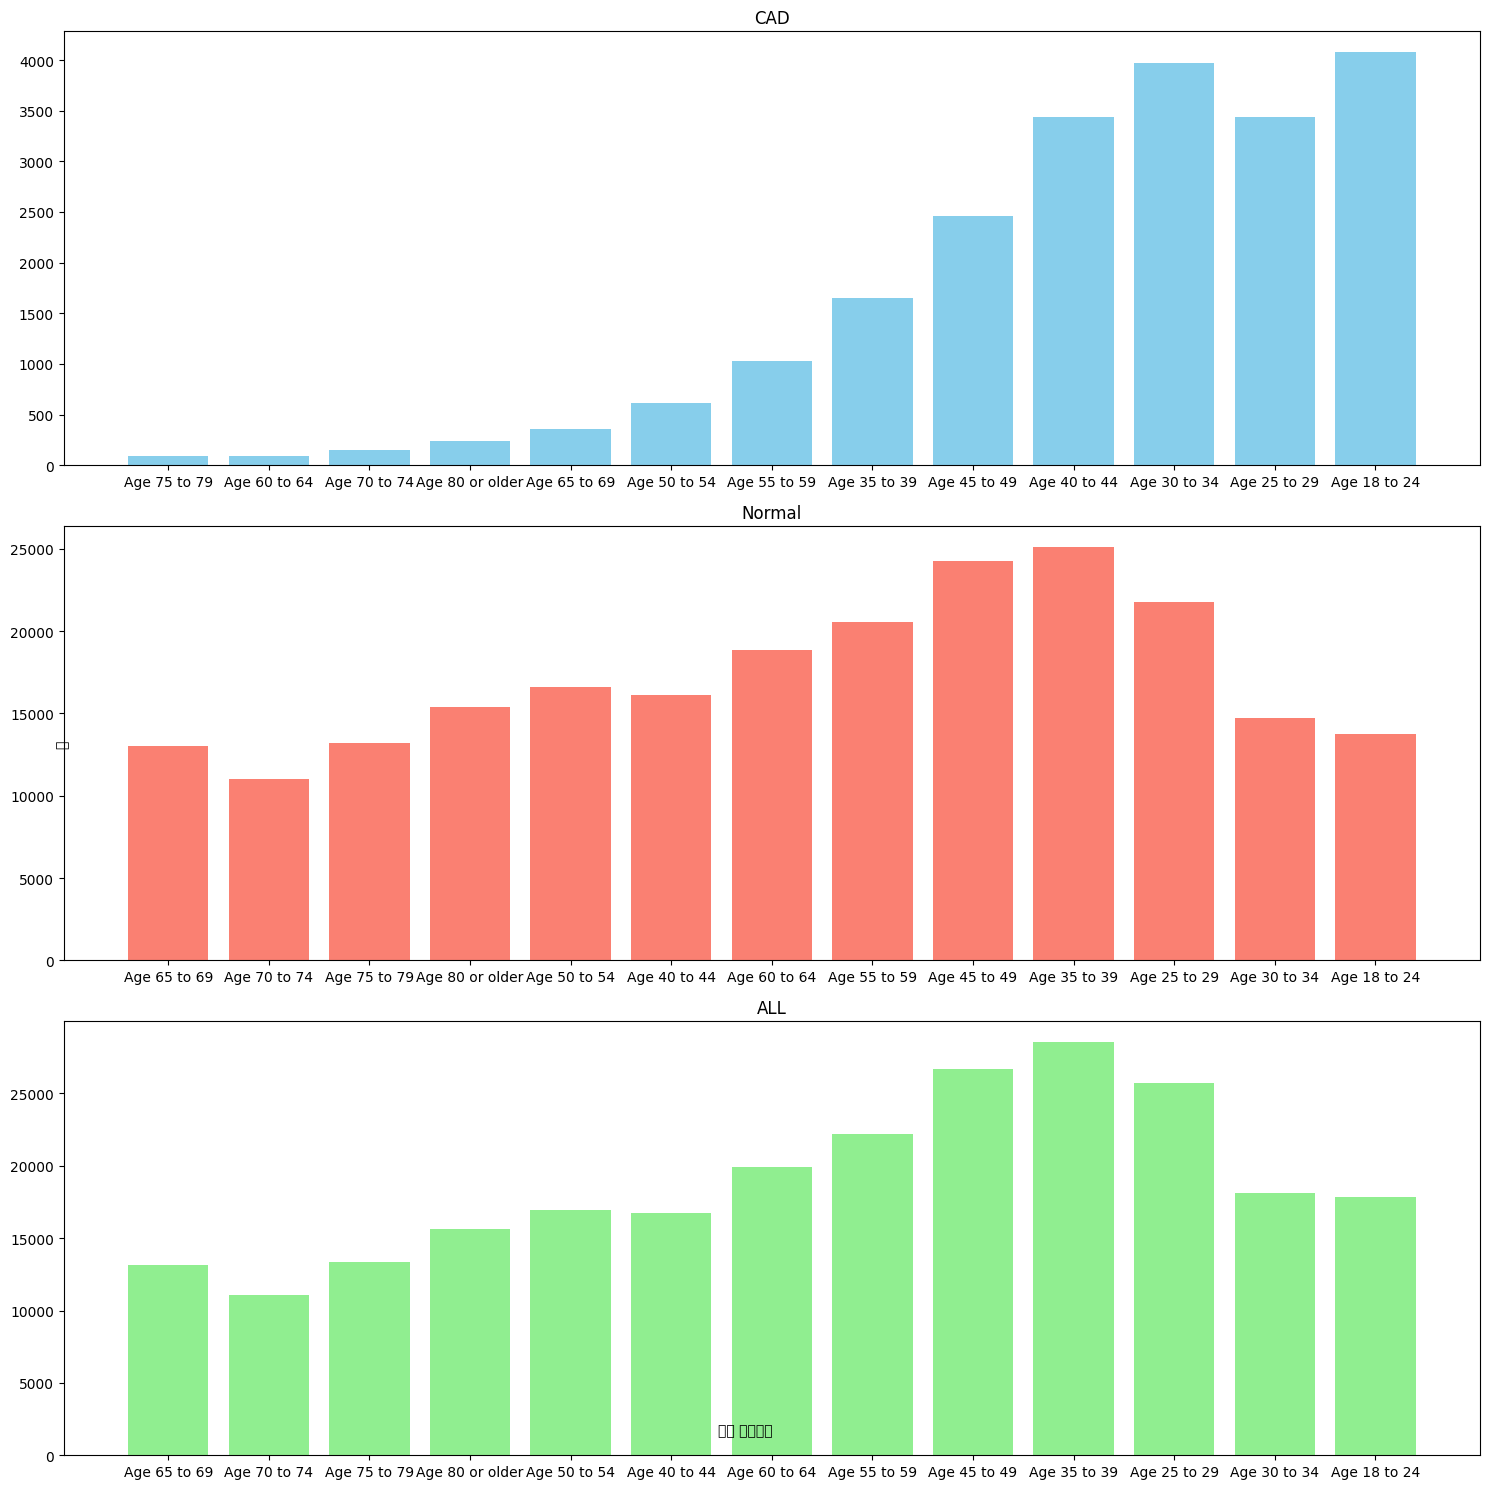

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, axs = plt.subplots(3, 1, figsize=(15, 15))  # 3행 1열의 subplot을 생성하고, 전체 그림 크기는 가로 15인치, 세로 15인치로 설정

# 첫 번째 subplot
axs[0].bar(target_df['AgeCategory'].unique(), target_df.groupby('AgeCategory').size(), color='skyblue')
axs[0].set_title('CAD')  # subplot 제목 설정

# 두 번째 subplot (예시 데이터를 위해 동일한 데이터 사용)
axs[1].bar(nontarget_df['AgeCategory'].unique(), nontarget_df.groupby('AgeCategory').size(), color='salmon')
axs[1].set_title('Normal')  # subplot 제목 설정

# 세 번째 subplot (예시 데이터를 위해 동일한 데이터 사용)
axs[2].bar(df['AgeCategory'].unique(), df.groupby('AgeCategory').size(), color='lightgreen')
axs[2].set_title('ALL')  # subplot 제목 설정

# 전체 그림의 x축 레이블 설정
fig.text(0.5, 0.04, '나이 카테고리', ha='center')

# 전체 그림의 y축 레이블 설정
fig.text(0.04, 0.5, '값', va='center', rotation='vertical')

plt.tight_layout()  # subplot 간 간격 조정
plt.show()

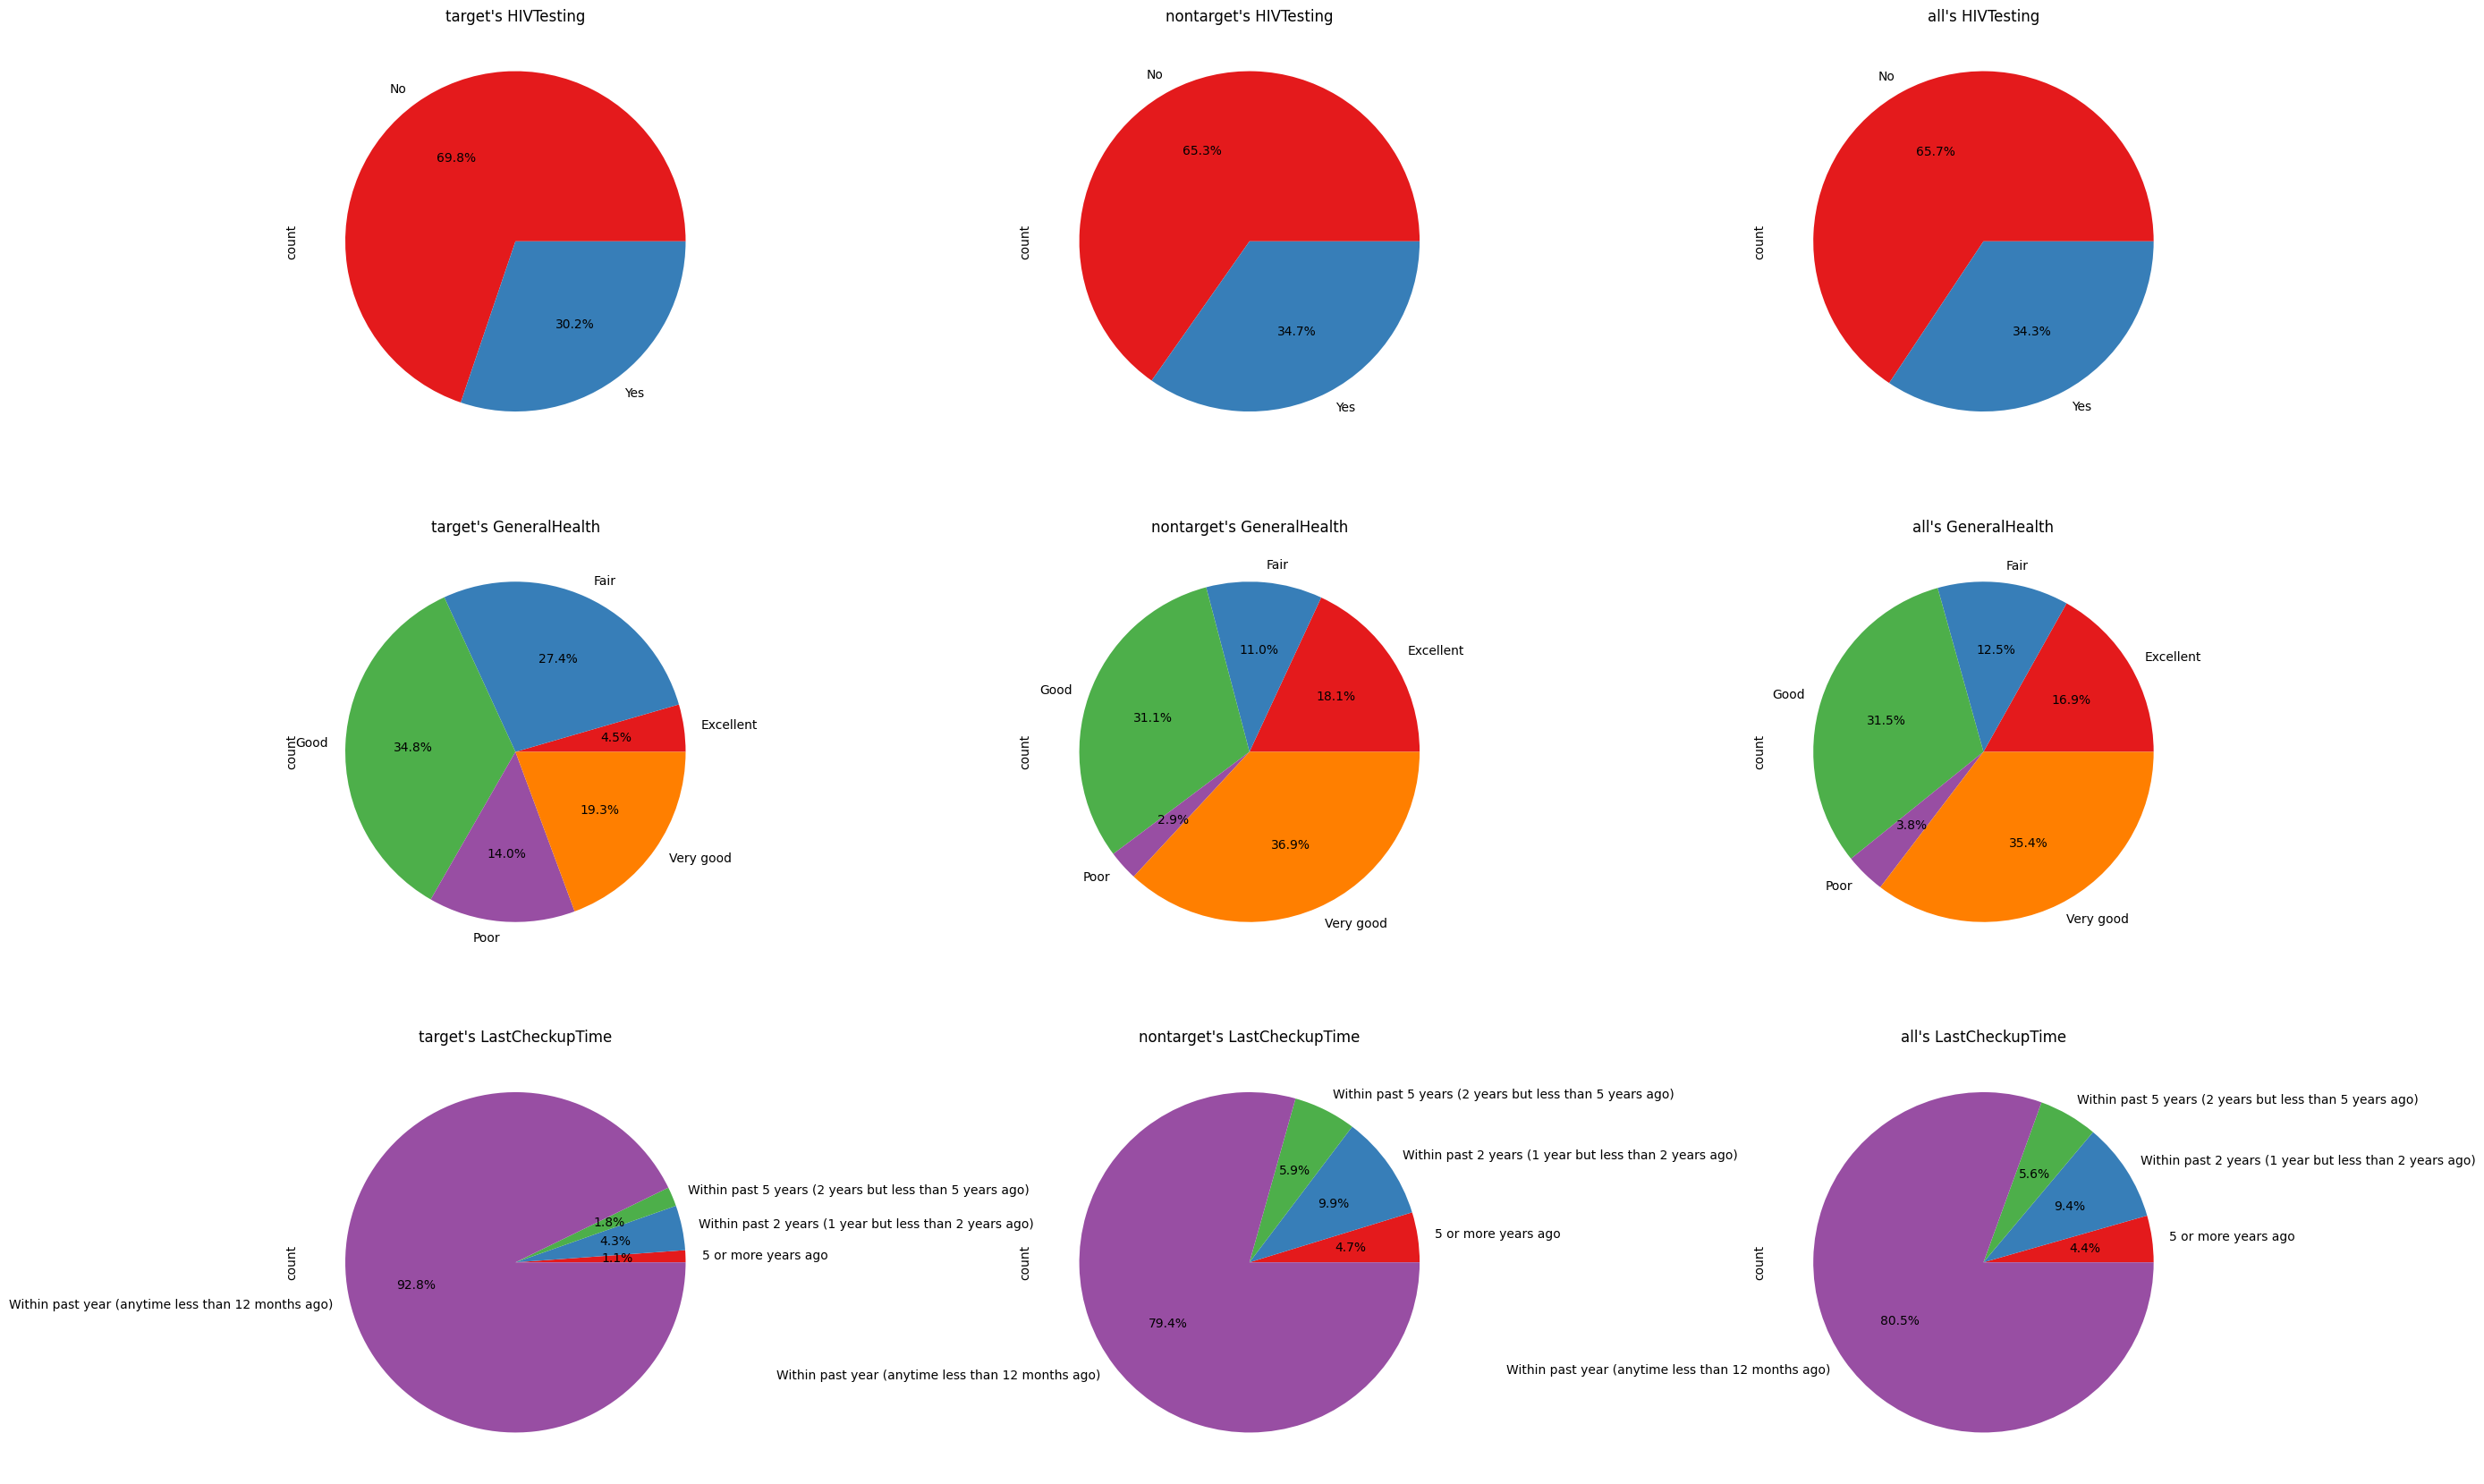

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
colors = plt.cm.Set1(range(9))
#colors = plt.cm.tab10(range(5))
fig,ax=plt.subplots(len(searchList_3), 3, figsize = (30,7*len(searchList_3)))
axnum=1
#explode=[0.02  for x in range(len(heart[index].cat.categories))],
for index in searchList_3:
    plt.subplot(len(searchList_3),3,axnum)
    plt.title('target\'s '+index)
    target_df[index].value_counts().sort_index().plot.pie(
                                                      autopct='%0.1f%%',colors=colors)
    axnum+=1

    plt.subplot(len(searchList_3),3,axnum)
    plt.title('nontarget\'s '+index)
    nontarget_df[index].value_counts().sort_index().plot.pie(
                                                         autopct='%0.1f%%',colors=colors)
    axnum+=1

    plt.subplot(len(searchList_3),3,axnum)
    plt.title('all\'s '+index)
    df[index].value_counts().sort_index().plot.pie(
                                                  autopct='%0.1f%%',colors=colors)
    axnum+=1



In [ ]:
import pandas as pd

replacement_dict = { 'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 2,
    'Age 40 to 44': 3,
    'Age 45 to 49': 3,
    'Age 50 to 54': 4,
    'Age 55 to 59': 4,
    'Age 60 to 64': 5,
    'Age 65 to 69': 5,
    'Age 70 to 74': 6,
    'Age 75 to 79': 6,
    'Age 80 or older': 7}
df['AgeCategory'] = df['AgeCategory'].replace(replacement_dict).astype(int)
df['AgeCategory']


<ipython-input-6-653623893d0f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeCategory'] = df['AgeCategory'].replace(replacement_dict).astype(int)


342       5
343       6
345       6
346       7
347       7
         ..
445117    5
445123    1
445124    5
445128    4
445130    6
Name: AgeCategory, Length: 246022, dtype: int64

In [ ]:
target_df=df[df.CAD==1]
nontarget_df=df[df.CAD==0]

In [ ]:
target_df[target_df['AgeCategory']>=4]['Sex'].value_counts()

Sex
Male      12178
Female     7888
Name: count, dtype: int64

<Axes: title={'center': 'ALL AgeCategory'}, ylabel='count'>

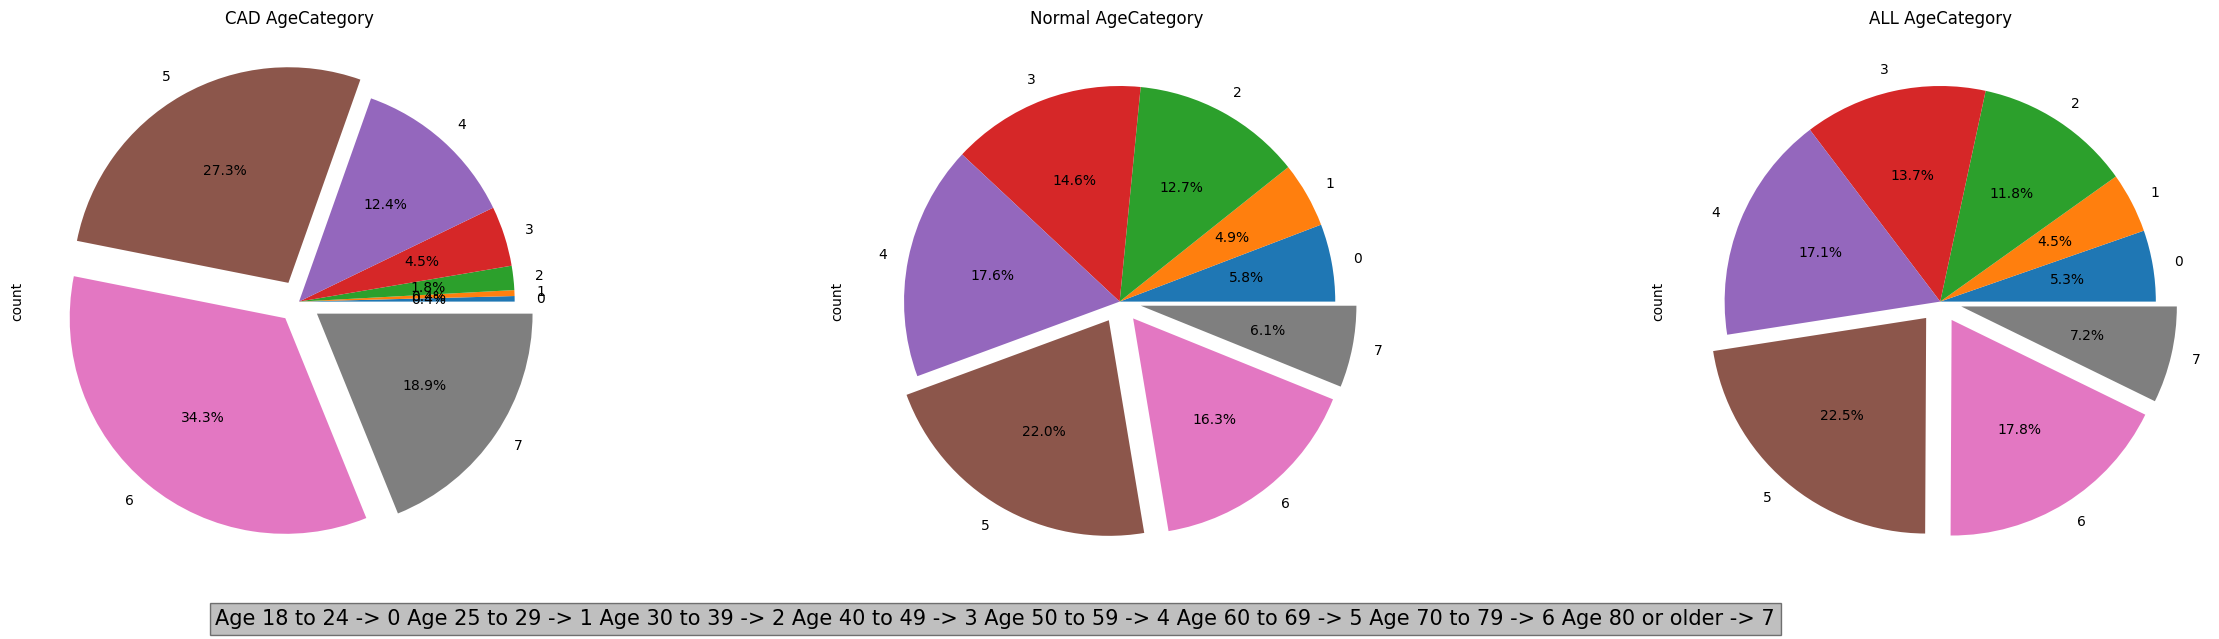

In [ ]:
explode = (0, 0, 0, 0, 0, 0.1, 0.1, 0.1)
plt.subplots(1, 3, figsize=(30, 7 * 1))
plt.text(-8,-1.5, 'Age 18 to 24 -> 0 Age 25 to 29 -> 1 Age 30 to 39 -> 2 Age 40 to 49 -> 3 Age 50 to 59 -> 4 Age 60 to 69 -> 5 Age 70 to 79 -> 6 Age 80 or older -> 7', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
plt.subplot(1, 3,1)
plt.title('CAD AgeCategory')
target_df['AgeCategory'].dropna().value_counts().sort_index().plot.pie(autopct='%0.1f%%',explode=explode)


plt.subplot(1, 3, 2)
plt.title('Normal AgeCategory ')
nontarget_df['AgeCategory'].dropna().value_counts().sort_index().plot.pie(autopct='%0.1f%%',explode=explode)


plt.subplot(1, 3,3 )
plt.title('ALL AgeCategory')
df['AgeCategory'].dropna().value_counts().sort_index().plot.pie(autopct='%0.1f%%',explode=explode)

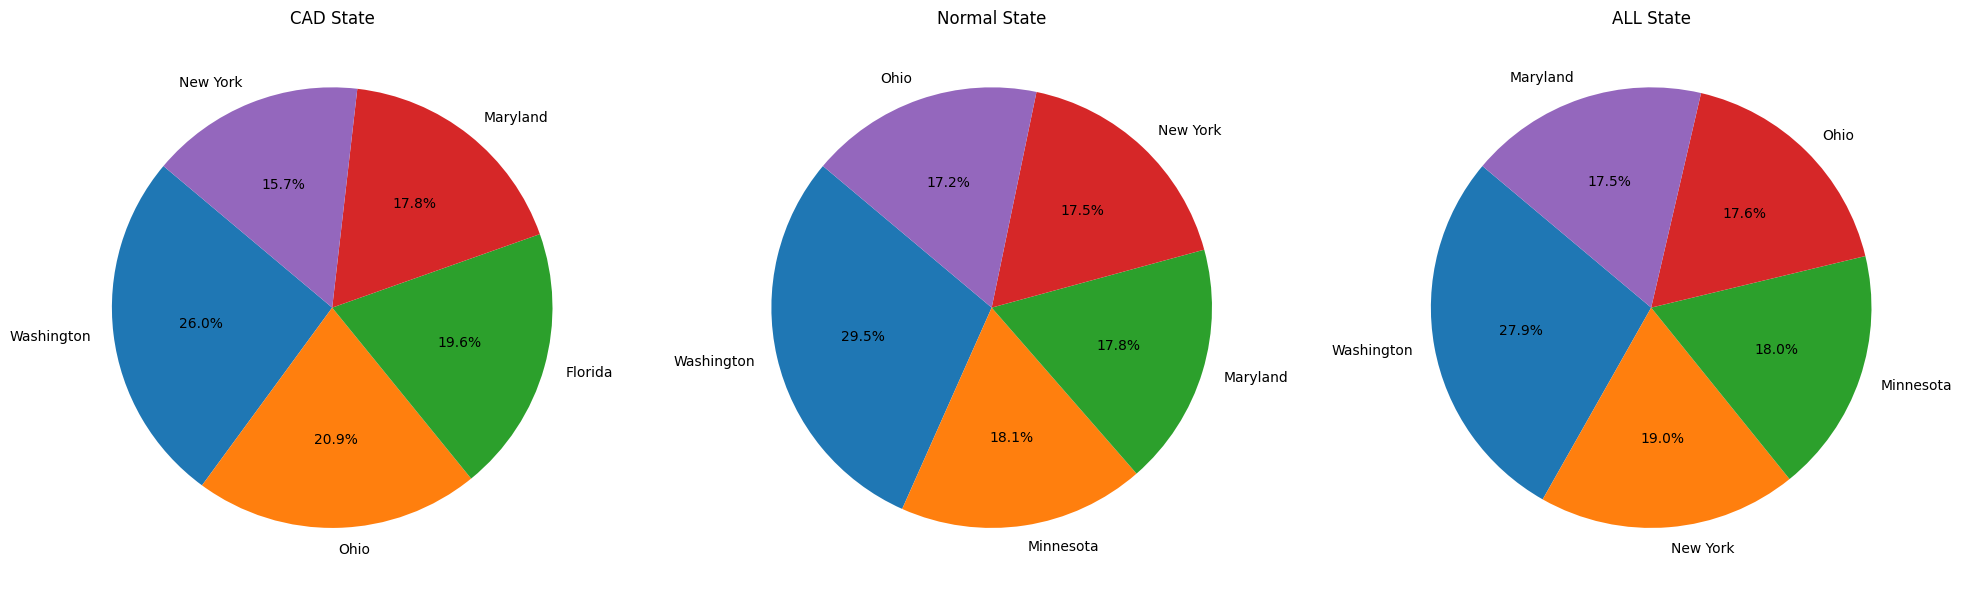

In [ ]:

top_states_target = target_df['State'].value_counts().head(5)
top_states_nontarget = nontarget_df['State'].value_counts().head(5)
top_states_heart = heart['State'].value_counts().head(5)

# 1행 3열로 원형 차트 생성
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 첫 번째 subplot: target_df의 State 상위 5개 값
axes[0].pie(top_states_target, labels=top_states_target.index, autopct='%0.1f%%', startangle=140)
axes[0].set_title('CAD State')

# 두 번째 subplot: nontarget_df의 State 상위 5개 값
axes[1].pie(top_states_nontarget, labels=top_states_nontarget.index, autopct='%0.1f%%', startangle=140)
axes[1].set_title('Normal State')

# 세 번째 subplot: heart의 State 상위 5개 값
axes[2].pie(top_states_heart, labels=top_states_heart.index, autopct='%0.1f%%', startangle=140)
axes[2].set_title('ALL State')

plt.tight_layout()
plt.show()

In [ ]:
 target_df['AgeCategory'].value_counts()

AgeCategory
5    7407
4    4115
7    4079
6    3435
3    1643
2     604
1     244
0      89
Name: count, dtype: int64

In [ ]:
df.select_dtypes(include='object').columns

Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
searchList=['Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_mappings = {}

for col in df.columns:
    if df[col].dtype == 'object':  # 데이터타입이 object인 경우 (명목형 변수)
        df[col] = label_encoder.fit_transform(df[col])

        # 변환된 값과 원래 값의 매핑 저장
        encoded_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# 각 명목형 변수의 변환 결과 출력
for col, mapping in encoded_mappings.items():
    print(f"{col}:")
    for key, value in mapping.items():
        print(f"{key} -> {value}")
    print()

# 최종 변환된 데이터프레임 출력
print("Transformed DataFrame:")
df


<ipython-input-11-71ca71c1b00f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-11-71ca71c1b00f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-11-71ca71c1b00f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

State:
Alabama -> 0
Alaska -> 1
Arizona -> 2
Arkansas -> 3
California -> 4
Colorado -> 5
Connecticut -> 6
Delaware -> 7
District of Columbia -> 8
Florida -> 9
Georgia -> 10
Guam -> 11
Hawaii -> 12
Idaho -> 13
Illinois -> 14
Indiana -> 15
Iowa -> 16
Kansas -> 17
Kentucky -> 18
Louisiana -> 19
Maine -> 20
Maryland -> 21
Massachusetts -> 22
Michigan -> 23
Minnesota -> 24
Mississippi -> 25
Missouri -> 26
Montana -> 27
Nebraska -> 28
Nevada -> 29
New Hampshire -> 30
New Jersey -> 31
New Mexico -> 32
New York -> 33
North Carolina -> 34
North Dakota -> 35
Ohio -> 36
Oklahoma -> 37
Oregon -> 38
Pennsylvania -> 39
Puerto Rico -> 40
Rhode Island -> 41
South Carolina -> 42
South Dakota -> 43
Tennessee -> 44
Texas -> 45
Utah -> 46
Vermont -> 47
Virgin Islands -> 48
Virginia -> 49
Washington -> 50
West Virginia -> 51
Wisconsin -> 52
Wyoming -> 53

Sex:
Female -> 0
Male -> 1

GeneralHealth:
Excellent -> 0
Fair -> 1
Good -> 2
Poor -> 3
Very good -> 4

LastCheckupTime:
5 or more years ago -> 0
Within 

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
342         0    0              4                 4.0               0.0   
343         0    1              4                 0.0               0.0   
345         0    1              4                 0.0               0.0   
346         0    0              1                 5.0               0.0   
347         0    0              2                 3.0              15.0   
...       ...  ...            ...                 ...               ...   
445117     48    1              4                 0.0               0.0   
445123     48    0              1                 0.0               7.0   
445124     48    1              2                 0.0              15.0   
445128     48    0              0                 2.0               2.0   
445130     48    1              4                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
342                   3                   1         9.0             3   
343                   3                   1         6.0             3   
345                   3                   0         8.0             1   
346                   3                   1         9.0             3   
347                   3                   1         5.0             0   
...                 ...                 ...         ...           ...   
445117                1                   1         6.0             3   
445123                3                   1         7.0             3   
445124                3                   1         7.0             0   
445128                3                   1         7.0             3   
445130                3                   0         5.0             3   

        HadStroke  ...  WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  \
342             0  ...              71.67  27.99                0           0   
343             0  ...              95.25  30.13                0           0   
345             0  ...             108.86  31.66                1           0   
346             0  ...              90.72  31.32                0           0   
347             0  ...              79.38  33.07                0           0   
...           ...  ...                ...    ...              ...         ...   
445117          0  ...             102.06  32.28                1           0   
445123          0  ...              90.72  24.34                0           0   
445124          1  ...              83.91  29.86                1           1   
445128          0  ...              83.01  28.66                0           1   
445130          0  ...             108.86  32.55                0           1   

        FluVaxLast12  PneumoVaxEver  TetanusLast10Tdap  HighRiskLastYear  \
342                1              1                  1                 0   
343                1              1                  2                 0   
345                0              1                  0                 0   
346                1              1                  0                 0   
347                1              1                  0                 0   
...              ...            ...                ...               ...   
445117             0              0                  2                 0   
445123             0              0                  0                 0   
445124             1              1                  2                 0   
445128             1              0                  2                 0   
445130             1              1                  0                 0   

        CovidPos  CAD  
342            0    0  
343            0    0  
345            2    0  
346            2    0  
347            0    0  
...          ...  ...  
445117         0    0  
445123         2    0  
445124         2    0  
445128         0    0  
445130         2    1  

[246022 rows x 39 columns]

In [ ]:
target_df=df[df.CAD==1]
nontarget_df=df[df.CAD==0]

In [ ]:

explode = (0.1, 0, 0, 0)
def showdetail(index):
    if index == 'Sex':
        plt.text(-1, -1, 'Female -> 0\nMale -> 1', fontsize=15,explode=explode, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'GeneralHealth':
        plt.text(-1, -1, 'Excellent -> 0\nFair -> 1\nGood -> 2\nPoor -> 3\nVery good -> 4', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'LastCheckupTime':
        plt.text(-1, -1, '5 or more years ago -> 0\nWithin past 2 years -> 1\nWithin past 5 years -> 2\nWithin past year -> 3', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'PhysicalActivities':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'RemovedTeeth':
        plt.text(-1, -1, '1 to 5 -> 0\n6 or more, but not all -> 1\nAll -> 2\nNone of them -> 3', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'HadStroke':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'HadAsthma':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'HadSkinCancer':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'HadCOPD':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'HadDepressiveDisorder':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'HadKidneyDisease':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'HadArthritis':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'HadDiabetes':
        plt.text(-1, -1, 'No -> 0\nNo, pre-diabetes or borderline diabetes -> 1\nYes -> 2\nYes, but only during pregnancy (female) -> 3', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'DeafOrHardOfHearing':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'BlindOrVisionDifficulty':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'DifficultyConcentrating':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'DifficultyWalking':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'DifficultyDressingBathing':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'DifficultyErrands':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'SmokerStatus':
        plt.text(-1, -1, 'Current smoker - now smokes every day -> 0\nCurrent smoker - now smokes some days -> 1\nFormer smoker -> 2\nNever smoked -> 3', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'ECigaretteUsage':
        plt.text(-1, -1, 'Never used e-cigarettes -> 0\nNot at all -> 1\nUse them every day -> 2\nUse them some days -> 3', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'ChestScan':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'RaceEthnicityCategory':
        plt.text(-1, -1, 'Black only, Non-Hispanic -> 0\nHispanic -> 1\nMultiracial, Non-Hispanic -> 2\nOther race only, Non-Hispanic -> 3\nWhite only, Non-Hispanic -> 4', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'AlcoholDrinkers':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'HIVTesting':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'FluVaxLast12':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'PneumoVaxEver':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'TetanusLast10Tdap':
        plt.text(-1, -1, 'No, did not receive any tetanus shot in the past 10 years -> 0\nYes, received Tdap -> 1\nYes, received tetanus shot but not sure what type -> 2\nYes, received tetanus shot, but not Tdap -> 3', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'HighRiskLastYear':
        plt.text(-1, -1, 'No -> 0\nYes -> 1', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))
    elif index == 'CovidPos':
        plt.text(-1, -1, 'No -> 0\nTested positive using home test without a health professional -> 1\nYes -> 2', fontsize=15, bbox=dict(facecolor='gray', alpha=0.5))

fig, ax = plt.subplots(len(searchList), 3, figsize=(30, 7 * len(searchList)))
axnum = 1

for index in searchList:
    plt.subplot(len(searchList), 3, axnum)
    plt.title('CAD ' + index)
    target_df[index].dropna().value_counts().sort_index().plot.pie(autopct='%0.1f%%')
    showdetail(index)
    axnum += 1

    plt.subplot(len(searchList), 3, axnum)
    plt.title('Normal ' + index)
    nontarget_df[index].dropna().value_counts().sort_index().plot.pie(autopct='%0.1f%%')
    showdetail(index)
    axnum += 1

    plt.subplot(len(searchList), 3, axnum)
    plt.title('ALL ' + index)
    heart[index].dropna().value_counts().sort_index().plot.pie(autopct='%0.1f%%')
    showdetail(index)
    axnum += 1

plt.tight_layout()
plt.show()
